### Machine Learning Workflow
#### *1.Collect and Prepare the data*
#### *2.Analyze the data*
#### *3.Create the model*
#### *4.Train the model*
#### *5.Evaluate the model*

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# utilize sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

In [12]:
# Collect DataSet
data_2015to2019 = pd.read_csv('whr2015to2019.csv')

# Eliminating NaN or missing input numbers 
data_2015to2019.fillna(method ='ffill', inplace = True) 

data_2015to2019.head()

,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2017,155,Central African Republic,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565
1,2015,158,Togo,2.839,0.208680,0.139950,0.284430,0.364530,0.166810,0.107310
2,2019,156,South Sudan,2.853,0.306000,0.575000,0.295000,0.010000,0.202000,0.091000
3,2017,154,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148
4,2015,157,Burundi,2.905,0.015300,0.415870,0.223960,0.118500,0.197270,0.100620


Pearson Correlation coefficient Matrix:
[[1.       0.789284]
 [0.789284 1.      ]]


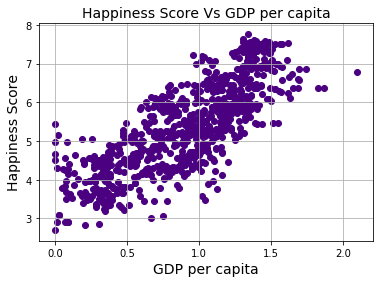

In [13]:
# The Pearson Correlation coefficient can be computed in Python using corrcoef() method from Numpy.
# Happiness Score vs GDP per capita
df = data_2015to2019.copy()
x_var = df['GDP per capita']
y_var = df['Score']
my_rho = np.corrcoef(x_var, y_var)

print("Pearson Correlation coefficient Matrix:")
print(my_rho)

plt.scatter(df['GDP per capita'], df['Score'], color='indigo')
plt.title('Happiness Score Vs GDP per capita', fontsize=14)
plt.xlabel('GDP per capita', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)

plt.savefig("GDP.png") 

plt.show()


Pearson Correlation coefficient Matrix:
[[1.         0.64879934]
 [0.64879934 1.        ]]


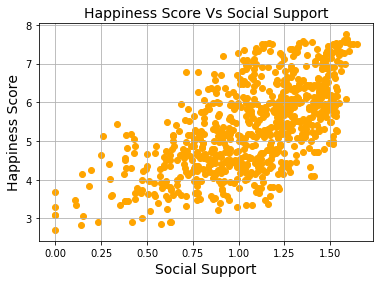

In [14]:
# Happiness Score vs Social Support
df = data_2015to2019.copy()
x_var = df['Social support']
y_var = df['Score']
my_rho = np.corrcoef(x_var, y_var)

print("Pearson Correlation coefficient Matrix:")
print(my_rho)

plt.scatter(df['Social support'], df['Score'], color='orange')
plt.title('Happiness Score Vs Social Support', fontsize=14)
plt.xlabel('Social Support', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)

plt.savefig("SocialSupport.png")

plt.show()

Pearson Correlation coefficient Matrix:
[[1.         0.74245574]
 [0.74245574 1.        ]]


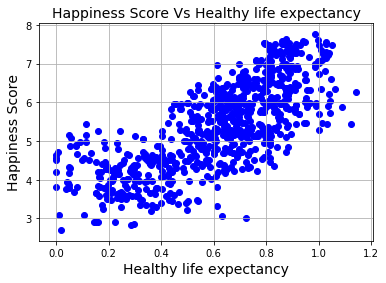

In [15]:
# Happiness Score vs Healthy life Expectancy

df = data_2015to2019.copy()
x_var = df['Healthy life expectancy']
y_var = df['Score']
my_rho = np.corrcoef(x_var, y_var)

print("Pearson Correlation coefficient Matrix:")
print(my_rho)

plt.scatter(df['Healthy life expectancy'], df['Score'], color='blue')
plt.title('Happiness Score Vs Healthy life expectancy', fontsize=14)
plt.xlabel('Healthy life expectancy', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)

plt.savefig("Life.png")

plt.show()


Pearson Correlation coefficient Matrix:
[[1.       0.551258]
 [0.551258 1.      ]]


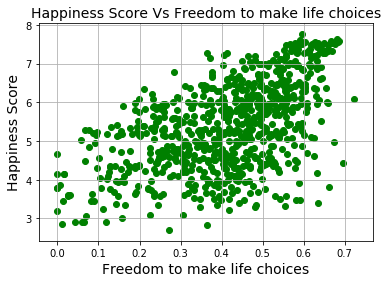

In [16]:
# Happiness Score vs Freedom to make life choices

df = data_2015to2019.copy()
x_var = df['Freedom to make life choices']
y_var = df['Score']
my_rho = np.corrcoef(x_var, y_var)

print("Pearson Correlation coefficient Matrix:")
print(my_rho)

plt.scatter(df['Freedom to make life choices'], df['Score'], color='green')
plt.title('Happiness Score Vs Freedom to make life choices', fontsize=14)
plt.xlabel('Freedom to make life choices', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)

plt.savefig("Freedom.png")

plt.show()


Pearson Correlation coefficient Matrix:
[[1.         0.13757773]
 [0.13757773 1.        ]]


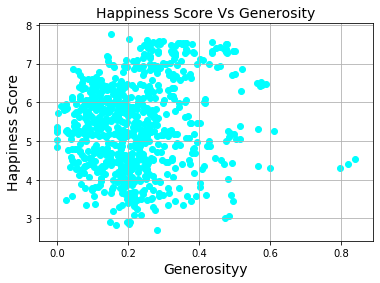

In [17]:
# Happiness Score vs Generosity

df = data_2015to2019.copy()
x_var = df['Generosity']
y_var = df['Score']
my_rho = np.corrcoef(x_var, y_var)

print("Pearson Correlation coefficient Matrix:")
print(my_rho)

plt.scatter(df['Generosity'], df['Score'], color='cyan')
plt.title('Happiness Score Vs Generosity', fontsize=14)
plt.xlabel('Generosityy', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)

plt.savefig("Generosity.png")

plt.show()

Pearson Correlation coefficient Matrix:
[[1.        0.3978213]
 [0.3978213 1.       ]]


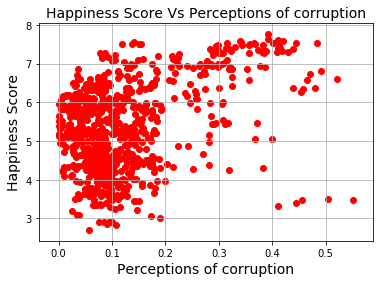

In [18]:
# Happiness Score vs Perceptions of corruption

df = data_2015to2019.copy()
x_var = df['Perceptions of corruption']
y_var = df['Score']
my_rho = np.corrcoef(x_var, y_var)

print("Pearson Correlation coefficient Matrix:")
print(my_rho)

plt.scatter(df['Perceptions of corruption'], df['Score'], color='Red')
plt.title('Happiness Score Vs Perceptions of corruption', fontsize=14)
plt.xlabel('Perceptions of corruption', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.grid(True)

plt.savefig("Corruption.png")

plt.show()

### Checking for Multicollinearity
#### Multicollinearity is a big problem in regression models, if present it causes regression models to be very sensitive and decreases the precision of the model.

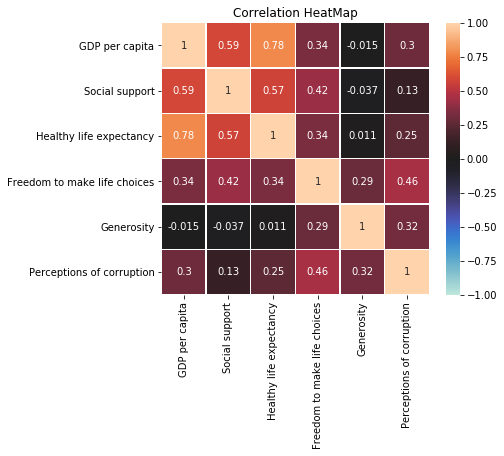

In [19]:
#list of column names to keep
col_names = ["Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

df = data_2015to2019[col_names]

#filtering the dataframe to include just the IV's (features) and another with just the DV's (target)

features = df.loc[:,df.columns != 'Score']
targets = df.loc[:,df.columns == 'Score']

#creating pairwise correlation of columns using Pearson's R,
corr = features.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')

plt.savefig("Multicollinearity.png")

plt.show()

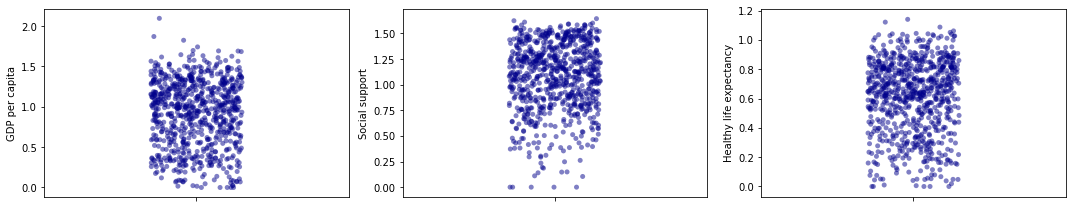

In [20]:
# Exploring the Data Visually using seaborn stripplot

sample_df1 = data_2015to2019[["GDP per capita", "Social support", "Healthy life expectancy"]]
plt.figure(figsize=(15, 3))

#function for plotting stripplots given a dataframe
def stripplot_these(df):
    for idx, name in enumerate(df.columns):
        n = idx + 1
        plt.subplot(1,3,n)
        sns.stripplot(x=name, data=df, jitter=0.15, orient= 'v', alpha=.5, color = 'darkblue')
    plt.tight_layout()

    plt.savefig("stripplots1.png")
    
    plt.show()


stripplot_these(sample_df1)

In [ ]:
sample_df2 = data_2015to2019[["Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
plt.figure(figsize=(15, 3))

#function for plotting stripplots given a dataframe
def stripplot_these(df):
    for idx, name in enumerate(df.columns):
        n = idx + 1
        plt.subplot(1,3,n)
        sns.stripplot(x=name, data=df, jitter=0.15, orient= 'v', alpha=.5, color = 'darkblue')
    plt.tight_layout()
    
    plt.savefig("stripplots2.png")
    
    plt.show()

stripplot_these(sample_df2)

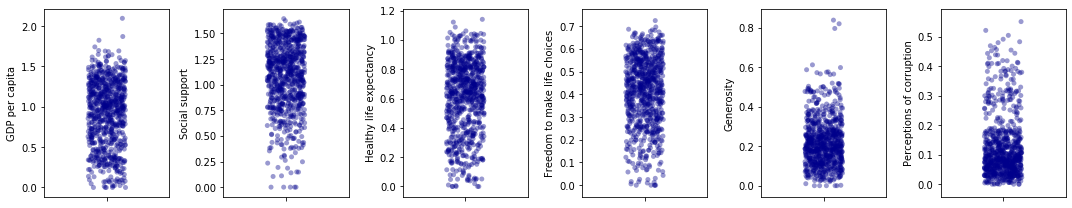

In [26]:
stripplot_df = data_2015to2019[["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
plt.figure(figsize=(15, 3))

#function for plotting stripplots given a dataframe
def stripplot_these(df):
    for idx, name in enumerate(df.columns):
        n = idx + 1
        plt.subplot(1,6,n)
        sns.stripplot(x=name, data=df, jitter=0.15, orient= 'v', alpha=.4, color = 'darkblue')
    plt.tight_layout()
    
    plt.savefig("stripplots6.png")
    
    plt.show()

stripplot_these(stripplot_df)


### Multivariate/multiple linear regression is one an extremely useful algorithm for tracking the relationships of continuous variables. It is also one of the most commonly used algorithms in machine learning

### Select multivariate/multiple linear regression, a linear regression carried out on more than one independent variable, comparing the correlations between features for the given number of features.
##### When implementing linear regression in a machine learning system, the variables must be continuous in nature, not categorical.
##### The dataset values are already continuous in our dataset, so we don't need to encode them at all.

In [39]:
# Assign the data to X and y

# X = data_2015to2019[["GDP per capita", "Social support", "Healthy life expectancy", 
#                      "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]

X = data_2015to2019[["GDP per capita", "Social support", "Healthy life expectancy", 
                     "Freedom to make life choices", "Generosity","Perceptions of corruption"]]

y = data_2015to2019["Score"].values.reshape(-1, 1)

# Dropping any rows with Nan values
data_2015to2019.dropna(inplace = True)

print(X.shape, y.shape)

(782, 6) (782, 1)


In [47]:
# Use train_test_split to create training and testing data
# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets:
# for training data and for testing data

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)


In [48]:
# R-squared
# R-squared has the useful property that its scale is intuitive: 
# it ranges from zero to one, 
# with zero indicating that the proposed model does not improve prediction over the mean model, 
# and one indicating perfect prediction. 
# Improvement in the regression model results in proportional increases in R-squared.
###
# RMSE
# The RMSE is the square root of the variance of the residuals. 
# It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. 
# Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. 
# As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, 
# and has the useful property of being in the same units as the response variable. 
# Lower values of RMSE indicate better fit. 
# RMSE is a good measure of how accurately the model predicts the response, 
# and it is the most important criterion for fit if the main purpose of the model is prediction.

In [41]:
# Select Multiple Linear Regression for our ML model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training R2 Score: {training_score}")
print(f"Testing R2 Score: {testing_score}")


# We'll now check the predictions against the actual values by using the RMSE and R-2 metrics, 
# two metrics commonly used to evaluate regression tasks:

# Prediction
pred = model.predict(X_test)

# Note that for rmse, the lower that value is, the better the fit
testset_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

# The closer towards 1, the better the fit
testset_r2 = r2_score(y_test, pred)


print(f"Test Set RMSE: {testset_rmse}")
print(f"Test Set R2: {testset_r2}")
# print(testset_rmse)
# print(testset_r2)


# print(f"Predicted Score: {pred}")

# score = model.score(X_train, y_train)
# print(f"R2 Score: {score}")

Training R2 Score: 0.7755999127353526
Testing R2 Score: 0.7151408209729091
Test Set RMSE: 0.6100957246059002
Test Set R2: 0.7151408209729091


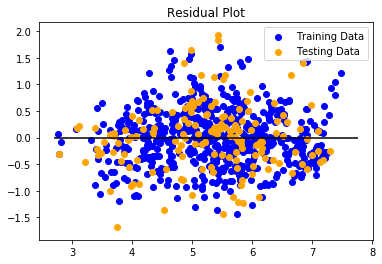

In [42]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

plt.savefig("ResidualPlot.png")



## Evaluate prediction with linear regression and statsmodel

In [ ]:
# Multiple linear regression formula
# The formula for a multiple linear regression is:
#
# y= B0 + B1X1 +...+ BnXn + e
# 
# y = the predicted value of the dependent variable
# B0 = the y-intercept (value of y when all other parameters are set to 0)
# B1X1= the regression coefficient (B1) of the first independent variable (X1) (a.k.a. the effect that increasing the value of the independent variable has on the predicted y value)
# … = do the same for however many independent variables you are testing
# BnXn = the regression coefficient of the last independent variable
# e = model error (a.k.a. how much variation there is in our estimate of y)

In [43]:
df = data_2015to2019.copy()
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [2.17753735]
Coefficients: 
 [[1.14712408 0.64089294 1.00368924 1.47930053 0.59378111 0.85265212]]


In [44]:
# with statsmodels
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     418.2
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          4.25e-239
Time:                        07:31:14   Log-Likelihood:                -638.30
No. Observations:                 782   AIC:                             1291.
Df Residuals:                     775   BIC:                             1323.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Prediction with Input 

In [45]:
# "GDP per capita", "Social support", "Healthy life expectancy", 
# "Freedom to make life choices", "Generosity", "Perceptions of corruption"
# prediction with sklearn
# Using 2019 Finland as example to evaluate prediction. Finland score was 7.769, rank 1
New_GDP = 1.34
New_Social_Support = 1.58
New_Health = 0.986
New_Freedom = 0.596
New_Generosity = 0.153
New_CDI = 0.393
print ('Predicted Score: \n', regr.predict([[New_GDP ,New_Social_Support, New_Health, New_Freedom, New_Generosity,New_CDI]]))

Predicted Score: 
 [[7.02453596]]


In [46]:
# "GDP per capita", "Social support", "Healthy life expectancy", 
# "Freedom to make life choices", "Generosity", "Perceptions of corruption"
# prediction with sklearn
# Using 2019 South Sudan as example to evaluate prediction. South Sudan score was 2.853, rank 156
New_GDP = 0.306
New_Social_Support = 0.575
New_Health = 0.295
New_Freedom = 0.01
New_Generosity = 0.202
New_CDI = 0.091
print ('Predicted Score: \n', regr.predict([[New_GDP ,New_Social_Support, New_Health, New_Freedom, New_Generosity, New_CDI]]))

Predicted Score: 
 [[3.40548722]]
